### Daniel Felipe Rojas Paternina               
---
# Taller ecuación de Laplace en coordenadas polares
1. Consideremos la ecuación de Laplace para $\psi(r,\theta) $ en coordenadas polares dada por
$$ \nabla^2 \psi(r,\theta) = \frac{\partial^2\psi(r,\theta)}{\partial r^2}+\frac{1}{r}\frac{\partial \psi(r,\theta)}{\partial r} + \frac{1}{r^2}\frac{\partial^2 \psi(r,\theta)}{\partial r^2}  $$
Obtengamos relaciones discretizadas para cada uno de los términos con el fin de encontrar una aproximación para la solución de la ecuación de Laplace. Inicialmente consideramos la segunda derivada parcial como una derivada centrada, por lo tanto 
$$ \frac{\partial^2\psi}{\partial x_i^2} = \frac{\frac{\partial \psi }{\partial x_i}|_{x_i+\Delta x} -\frac{\partial \psi }{\partial x_i}|_{x_i-\Delta x}}{2\Delta x_i}  $$
de modo que si el primer término lo remplazamos por una derivada backward y el segundo por una derivada forward obtendremos
$$ \frac{\partial^2\psi}{\partial x_i^2} = \frac{1}{2 \Delta x_i^2}\left[\psi(x_i+\Delta x_i)+\psi(x_i-\Delta x_i)-2\psi(x_i)\right]$$
Con este resultado tendremos entonces 
\begin{aligned}
\frac{\partial^2\psi}{\partial r^2} &= \frac{1}{2 \Delta r^2}\left[\psi(r+\Delta r,\theta)+\psi(r-\Delta r,\theta)-2\psi(r,\theta)\right] \\
\frac{\partial^2\psi}{\partial \theta^2} &= \frac{1}{2 \Delta \theta^2}\left[\psi(r, \theta+\Delta\theta)+\psi(r,\theta-\Delta\theta)-2\psi(r,\theta)\right]
\end{aligned}
Adicionalmente, consideremos el termino de derivada radial como una derivada forward. Por lo tanto
$$ \frac{\partial \psi}{\partial r} = \frac{1}{\Delta r} \left[\psi(r+\Delta r, \theta)- \psi(r,\theta) \right] $$
Juntando los tres resultados obtendremos entonces 
\begin{aligned}
\frac{1}{2 \Delta r^2}\left[\psi(r+\Delta r,\theta)+\psi(r-\Delta r,\theta)-2\psi(r,\theta)\right] +\frac{1}{r\Delta r} \left[\psi(r+\Delta r, \theta)- \psi(r,\theta) \right] +\frac{1}{2r^2 \Delta \theta^2}\left[\psi(r, \theta+\Delta\theta)+\psi(r,\theta-\Delta\theta)-2\psi(r,\theta)\right]  = 0
\end{aligned}
Si organizamos los términos que correspondientes a la función evaluada en el punto $(r,\theta)$ y los ponemos al otro lado de la igualdad obtendremos 
\begin{aligned}
\psi(r,\theta)\left[ \frac{1}{ \Delta r^2}  + \frac{1}{r\Delta r} + \frac{1}{r^2 \Delta \theta^2}\right] = \psi(r+\Delta r,\theta)\left[  \frac{1}{r\Delta r} + \frac{1}{ 2\Delta r^2} \right] + \psi(r-\Delta r,\theta) \frac{1}{ 2\Delta r^2} +\left[ \psi(r,\theta + \Delta \theta)  + \psi(r,\theta - \Delta \theta) \right] \frac{1}{2r^2 \Delta \theta^2} 
\end{aligned}
por lo tanto, tendremos que 
\begin{aligned}
\psi(r,\theta) = \frac{1}{\left[ \frac{1}{ \Delta r^2}  + \frac{1}{r\Delta r} + \frac{1}{r^2 \Delta \theta^2}\right] } g(r,\theta,\Delta r, \Delta \theta)
\end{aligned}
donde 
$$ g(r,\theta,\Delta r, \Delta \theta) = \psi(r+\Delta r,\theta)\left[  \frac{1}{r\Delta r} + \frac{1}{ 2\Delta r^2} \right] + \psi(r-\Delta r,\theta) \frac{1}{ 2\Delta r^2} +\left[ \psi(r,\theta + \Delta \theta)  + \psi(r,\theta - \Delta \theta) \right] \frac{1}{2r^2 \Delta \theta^2}  $$

---
2. Consideremos entonces la ecuación de Laplace con condiciones de contorno 
\begin{aligned}
\psi(r,\theta=0)&=0 \quad & \psi(r,\theta=2\pi/3)=100 \qquad 0\leq r \leq 2\\
\psi(r=2,\theta)&=100 & \qquad 0 \leq \theta \leq 2\pi/3
\end{aligned}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [22]:
#Función general
def Psi_sol(r_dom,theta_dom,Psi0,n,s):
    ''' r_dom: Lista con valor mínimo y máximo de la variable r
        theta_dom: Lista con valor mínimo y máximo de la variable theta
        Psi0: Lista con condiciones de contorno de la forma [thetamin, thetamax, r]
        n: número de datos
        s: número de iteraciones 
    '''
    
    #Creación de la lista de solución
    Psi = np.ones([n,n])*50
    
    #Se incertan las condiciones de frontera
    Psi[:,0].fill(Psi0[0])
    Psi[:,-1].fill(Psi0[1])
    Psi[-1].fill(Psi0[2])
    
    R = np.linspace(r_dom[0], r_dom[1],n)
    Theta = np.linspace(theta_dom[0], theta_dom[1],n)


    for ss in range(s):
        for r in range(1,n-1):
            for theta in range(1,n-1):
                dr = R[r]-R[r-1]
                dtheta = Theta[theta]-Theta[theta-1]
                g  = Psi[r+1][theta]/(r*dr) +  Psi[r+1][theta]/(2* dr**2) + Psi[r-1][theta]/(2* dr**2) + (Psi[r][theta+1]+Psi[r][theta-1])/(2*r**2*dtheta**2)
                dT = (dr**2)**-1 + (r*dr)**-1 + (r**2*dtheta**2)**-1 
                Psi[r][theta] = g/dT
    return Psi

In [71]:
r_dom = [0,2]
theta_dom = [0,np.pi*2/3]
Psi0 = [0,100,100]
n = 100
s = 10000
Psi1 = Psi_sol(r_dom,theta_dom,Psi0,n,s)

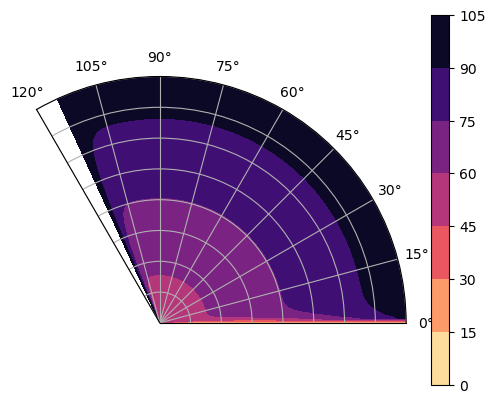

In [21]:
r     = np.linspace(r_dom[0],r_dom[1],n)
theta = np.linspace(theta_dom[0],theta_dom[1],n)

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(r, theta, Psi1, cmap=cm.magma_r)
plt.colorbar(ctf)
plt.axis([0,2*np.pi/3,0,2])
plt.show()

---
3. Ahora escojamos una condición de frontera que cambie con la ubicación, integrándolo directamente en la función

In [18]:
def Psi_sol2(r_dom,theta_dom,n,s):
    ''' r_dom: Lista con valor mínimo y máximo de la variable r
        theta_dom: Lista con valor mínimo y máximo de la variable theta
        n: número de datos
        s: número de iteraciones 
    '''
    
    #Creación de la lista de solución
    Psi = np.ones([n,n])*50
    
    #Se incertan las condiciones de frontera
    for i in range(0,n):
        Psi[i][0] = 0
        Psi[i][-1] = 3*i
        Psi[-1][i] = 10*i
    
    R = np.linspace(r_dom[0], r_dom[1],n)
    Theta = np.linspace(theta_dom[0], theta_dom[1],n)


    for ss in range(s):
        for r in range(1,n-1):
            for theta in range(1,n-1):
                dr = R[r]-R[r-1]
                dtheta = Theta[theta]-Theta[theta-1]
                g  = Psi[r+1][theta]/(r*dr) +  Psi[r+1][theta]/(2* dr**2) + Psi[r-1][theta]/(2* dr**2) + (Psi[r][theta+1]+Psi[r][theta-1])/(2*r**2*dtheta**2)
                dT = (dr**2)**-1 + (r*dr)**-1 + (r**2*dtheta**2)**-1 
                Psi[r][theta] = g/dT
    return Psi

In [23]:
n1 = 100
s1 = 1000
r_dom = [0,2]
theta_dom = [0,np.pi*2/3]
Psi0 = [0,100,100]
Psi2 = Psi_sol2(r_dom,theta_dom,n1,s1)

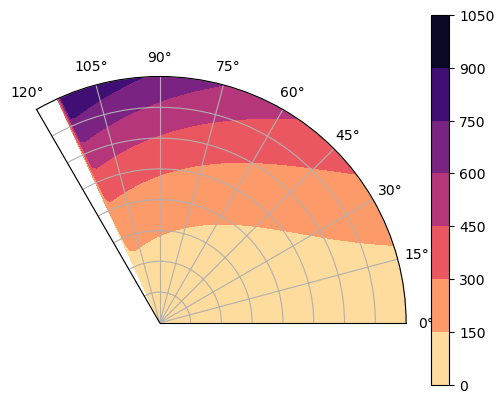

In [24]:
r     = np.linspace(r_dom[0],r_dom[1],n1)
theta = np.linspace(theta_dom[0],theta_dom[1],n1)

ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(r, theta, Psi2, cmap=cm.magma_r)
plt.colorbar(ctf)
plt.axis([0,2*np.pi/3,0,2])
plt.show()